In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# To display all columns in the dataset.
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('datas/titanic.csv')
data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.shape

(1309, 14)

In [4]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
data.isnull().mean().mul(100.).round(2)

pclass        0.00
survived      0.00
name          0.00
sex           0.00
age          20.09
sibsp         0.00
parch         0.00
ticket        0.00
fare          0.08
cabin        77.46
embarked      0.15
boat         62.87
body         90.76
home.dest    43.09
dtype: float64

In the variables Age there is 20% of data missing.

There is 77% of data missing in the variable Cabin, in which the passenger was traveling.

There is 0.15% of data missing in the field Embarked (the port from which the passenger boarded the Titanic).


## Mechanisms of Missing Data
#### **Missing data Not At Random (MNAR)**

The missing values of the variables age and cabin, were introduced systematically. For many of those who did not survive, their age or their cabin remains unknown. The people who survived could have been otherwise asked for that information.

Can we infer this by looking at the data?

If data is MNAR, we could expect a greater number of missing values for people who did not survive.

Let's have a look.

In [9]:
# Let's create a binary variable that indicates 
# if the value of cabin is missing.

data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0)

In [11]:
# Let's evaluate the percentage of missing values in
# cabin for the people who survived vs the non-survivors.

# The variable Survived takes the value 1 if the passenger
# survived, or 0 otherwise.

# Group data by Survived vs Non-Survived
# and find the percentage of NaN for Cabin.

data.groupby(['survived'])['cabin_null'].mean().mul(100)

survived
0    87.391842
1    61.400000
Name: cabin_null, dtype: float64

In [15]:
# Let's do the same for the variable age:

data['age'].isna().groupby(data['survived']).mean().mul(100)

survived
0    23.485785
1    14.600000
Name: age, dtype: float64

We observe more missing data points for the people who did not survive. The analysis therefore suggests that there was a systematic loss of data: people who did not survive had more missing information. Presumably, the method chosen to gather the information contributes to the generation of this missing data.

#### **Missing data Completely At Random (MCAR)**

In [16]:
# In the titanic dataset, there are also missing values
# for the variable Embarked.

# Let's have a look.

# Let's slice the dataframe to show only the observations
# with missing values for Embarked.

data[data.embarked.isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0



These 2 women were traveling together. Miss Icard was the maid of Mrs. Stone.

A priori, there does not seem to be an indication that the missing information in the variable "embarked" is dependent on any other variable, and the fact that these women survived means that they could have been asked for this information.

It is very likely the values were lost at the time of building the dataset.

If these values are MCAR, the likelihood of data missing for these two women is the same as the likelihood of data missing for any other person on the Titanic. Of course, this will be hard, if possible at all, to prove.


#### **Missing data at Random (MAR)**

We will use the financial dataset from the peer-to-peer lending company.

We will look at the variables "employment" and "years in employment", both declared by the borrowers at the time of applying for a loan.

In this example, data missing in employment are associated with data missing in time in employment.


In [17]:
# Let's load the dataset with just the 2
# variables.

data = pd.read_csv('datas/loan.csv', usecols=['employment', 'time_employed'])

data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [19]:
data.shape

(10000, 2)

In [18]:
data.isna().sum()

employment       611
time_employed    529
dtype: int64

<AxesSubplot:>

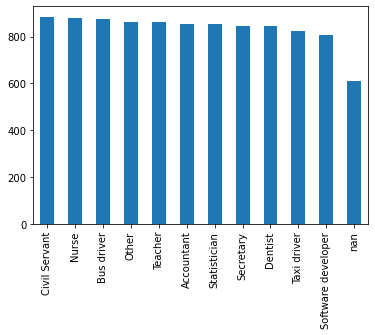

In [20]:
data.employment.value_counts(dropna=False).plot.bar()

<AxesSubplot:>

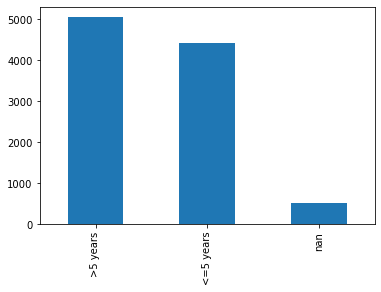

In [21]:
data.time_employed.value_counts(dropna=False).plot.bar()

The customer can't enter a value for employment time if they are not employed. They could be students, retired, self-employed, or something else. Note how these 2 variables are related to each other.

In [25]:
# Let's calculate the proportion of missing data 
# in time_employed variable when
# customers declared employment.

# Customers who declared employment
t = data[~data.employment.isna()]

# Percentage of missing data in time employed
t.time_employed.isna().mean() * 100.

0.053253807647246784

In [26]:
nt = data[data.employment.isna()]
nt.time_employed.isna().mean() * 100.

85.76104746317512

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Customers who did not report an occupation, on the other hand, mostly show missing values in the time_employed variable.

This further supports the hypothesis that the missing values in employment are related to the missing values in time_employed.

This is an example of MAR.


# Cardinatity

Cardinality

The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable gender the categories are male and female, whereas in the variable city the labels could be London, Manchester, Brighton, and so on.

Categorical variables can contain different numbers of categories. The variable "gender" contains only 2 labels, but a variable like "city" or "postcode" can contain a huge number of labels.

The number of different labels is known as cardinality. A high number of labels within a variable is known as high cardinality.

### Is high cardinality a problem?

High cardinality poses the following challenges: 
- Variables with too many labels tend to dominate those with only a few labels, particularly in **decision tree-based algorithms**.
- High cardinality may introduce noise.
- Some of the labels may only be present in the training data set and not in the test set, so machine learning algorithms may over-fit to the training set.
- Some labels may appear only in the test set, leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

**Algorithms based on decision trees can be biased towards variables with high cardinality**.

Below is a demo about the effect of high cardinality on the performance of various machine learning algorithms.

**Aims**

- Learn how to quantify cardinality.
- See examples of high and low cardinality variables.
- Understand the effect of cardinality in train and test sets.
- Evaluate the effect of cardinality on machine learning model performance.


In [27]:
# The machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To evaluate the models.
from sklearn.metrics import roc_auc_score

# To separate data into train and test.
from sklearn.model_selection import train_test_split


In [28]:
data = pd.read_csv('datas/titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The categorical variables are Name, Sex, Ticket, Cabin and Embarked.

Note that Ticket and Cabin contain both letters and numbers, so they could be treated as Mixed Variables. In this demo, I will treat them as categorical.

In [ ]:
# Let's inspect the cardinality: the number
# of different labels.
def cardinality_inspect(df):
    for col in df.columns:
        print(f"Number of categories in {col}: {len(df[col].unique())}.")
        print()
        
        
cat_df = data.copy()
cat_cols = ['name', 'sex', 'ticket', 'cabin', 'embarked']
cardinality_inspect(cat_df[cat_cols])
